In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo  # For fetching the CCPP dataset
from sklearn.linear_model import LinearRegression  # For regression modeling

# Fetch the CCPP dataset from UCI
combined_cycle_power_plant = fetch_ucirepo(id=294)

# Extract features and target
X = combined_cycle_power_plant.data.features  # Features: AT, V, AP, RH
y = combined_cycle_power_plant.data.targets   # Target: PE

# Combine into a single DataFrame for easier analysis
df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

# Display the first few rows to verify loading
print(df.head())

# Quick summary of the dataset
print(df.describe())

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90
                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000


Missing values in dataset:
 AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64
                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000


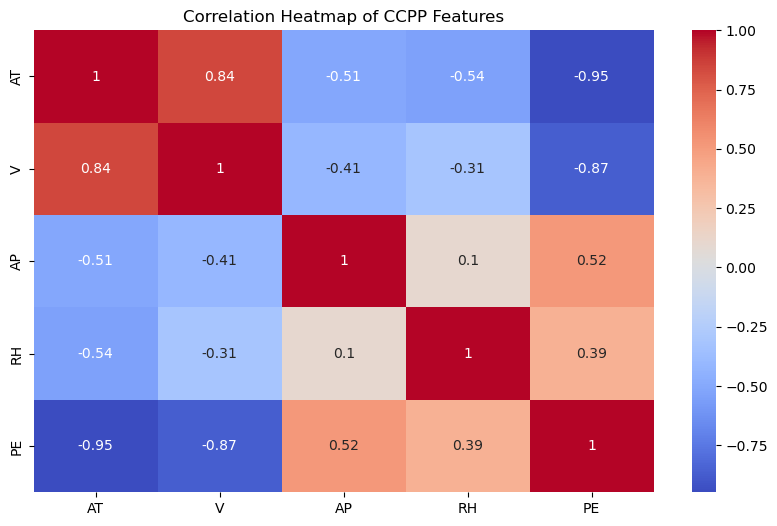

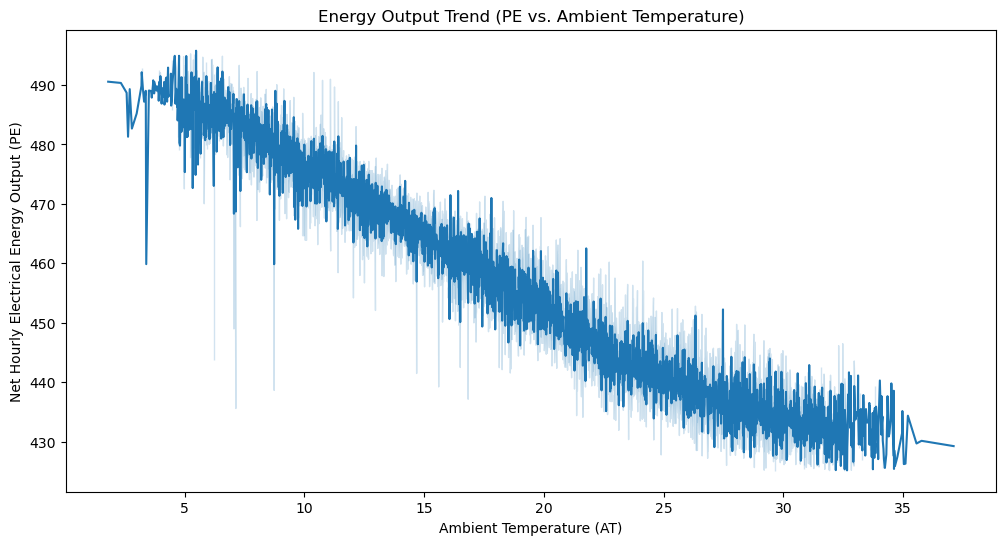

In [24]:
# Perform Exploratory Data Analysis (EDA)
import seaborn as sns  # For enhanced visualizations

# Check for missing values
print("Missing values in dataset:\n", df.isnull().sum())

# Summary statistics
print(df.describe())

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of CCPP Features')
plt.show()  # This will display the plot in the notebook

# Energy output trend plot (e.g., PE vs. AT as a time series proxy)
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['AT'], y=df['PE'])  # Plotting PE against AT to show trends
plt.title('Energy Output Trend (PE vs. Ambient Temperature)')
plt.xlabel('Ambient Temperature (AT)')
plt.ylabel('Net Hourly Electrical Energy Output (PE)')
plt.show()  # This will display the plot in the notebook

In [31]:
# Load the dataset
df = pd.read_csv('combined_cycle_power_plant.csv')

# Ensure the dataframe is sorted
df = df.sort_index()  # Sort by index; adjust if needed for your data

# Add lagged feature for PE (e.g., 1-hour lag)
df['PE_lag_1'] = df['PE'].shift(1)

# Add rolling average feature for PE (e.g., 3-hour rolling mean)
df['PE_rolling_mean_3'] = df['PE'].rolling(window=3).mean()

# Drop any rows with NaN values
df = df.dropna()

# Display the updated dataframe (for verification)
df.head()

,AT,V,AP,RH,PE,PE_lag_1,PE_rolling_mean_3
2,5.11,39.40,1012.16,92.14,488.56,444.37,465.396667
3,20.86,57.32,1010.24,76.64,446.48,488.56,459.803333
4,10.82,37.50,1009.23,96.62,473.90,446.48,469.646667
5,26.27,59.44,1012.23,58.77,443.67,473.90,454.683333
6,15.89,43.96,1014.02,75.24,467.35,443.67,461.640000


In [30]:
from sklearn.preprocessing import StandardScaler
# Assuming 'df' is your dataframe with features like AT, V, AP, RH, PE, PE_lag_1, etc.
# Select the features to standardize (exclude the target 'PE' if it's your dependent variable)
features = ['AT', 'V', 'AP', 'RH', 'PE_lag_1', 'PE_rolling_mean_3']  # Adjust based on your columns
scaler = StandardScaler()

# Apply standardization
df[features] = scaler.fit_transform(df[features])

# Verify the changes
print(df.head())

         AT         V        AP        RH      PE  PE_lag_1  PE_rolling_mean_3
2 -1.951178 -1.173015 -0.184793  1.289666  488.56 -0.585564           1.120782
3  0.162208  0.237164 -0.508153  0.228045  446.48  2.003546           0.552493
4 -1.184992 -1.322532 -0.678254  1.596509  473.90 -0.461938           1.552587
5  0.888140  0.403994 -0.173004 -0.995902  443.67  1.144611           0.032296
6 -0.504683 -0.814175  0.128462  0.132156  467.35 -0.626577           0.739101


Linear Regression MSE: 20.27, R2: 0.9301, MAE: 3.60
Random Forest MSE: 10.54, R2: 0.9637, MAE: 2.33


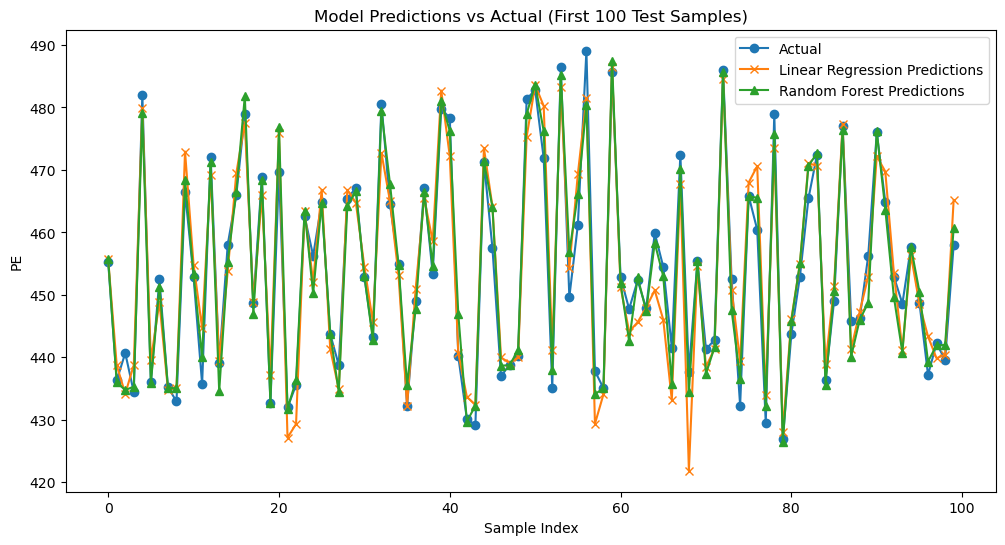

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Added mean_absolute_error
import matplotlib.pyplot as plt

# Assuming 'df' is your preprocessed dataframe
X = df.drop('PE', axis=1)
y = df['PE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f'Linear Regression MSE: {mse_lr:.2f}, R2: {r2_lr:.4f}, MAE: {mae_lr:.2f}')

# Evaluate Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f'Random Forest MSE: {mse_rf:.2f}, R2: {r2_rf:.4f}, MAE: {mae_rf:.2f}')

# Plot for clarity (first 100 samples)
n_plot = 100
plt.figure(figsize=(12,6))
plt.plot(range(n_plot), y_test.iloc[:n_plot], label='Actual', marker='o')
plt.plot(range(n_plot), y_pred_lr[:n_plot], label='Linear Regression Predictions', marker='x')
plt.plot(range(n_plot), y_pred_rf[:n_plot], label='Random Forest Predictions', marker='^')
plt.legend()
plt.title('Model Predictions vs Actual (First 100 Test Samples)')
plt.xlabel('Sample Index')
plt.ylabel('PE')
plt.show()

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest on Validation Set: MSE: 13.13, R2: 0.9549, MAE: 2.54
Random Forest on Test Set: MSE: 11.23, R2: 0.9613, MAE: 2.44
Random Forest on Training Set: MSE: 1.64, R2: 0.9944, MAE: 0.91


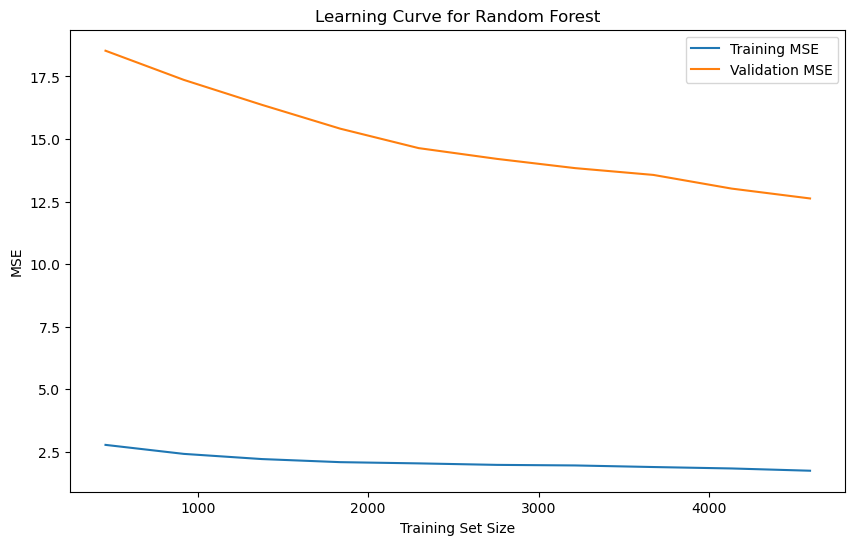

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming 'df' is your preprocessed dataframe (with features like PE_lag_1 and standardized columns)
# If not, load and preprocess it here before running this code
# df = pd.read_csv('combined_cycle_power_plant.csv')
# df = df.dropna()  # Clean data as needed

# Step 1: Prepare features and target
X = df.drop('PE', axis=1)  # Features (all columns except the target)
y = df['PE']  # Target variable

# Step 2: Split data into train+validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split train_val into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 75% train, 25% val of the train_val set

# Step 3: Hyperparameter tuning with GridSearchCV (expanded grid to reduce overfitting)
param_grid = {
    'n_estimators': [100, 200, 300],  # More options for number of trees
    'max_depth': [None, 10, 20, 30],  # Limit depth to prevent overfitting
    'min_samples_split': [2, 5, 10],  # Higher values reduce overfitting
    'min_samples_leaf': [1, 2]  # New addition: Ensures leaves have enough samples
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)  # n_jobs for faster processing
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from tuning
print(f"Best parameters: {grid_search.best_params_}")

# Step 4: Train the best model
best_rf_model = grid_search.best_estimator_

# Step 5: Evaluate on validation set
y_val_pred_rf = best_rf_model.predict(X_val)
mse_val_rf = mean_squared_error(y_val, y_val_pred_rf)
r2_val_rf = r2_score(y_val, y_val_pred_rf)
mae_val_rf = mean_absolute_error(y_val, y_val_pred_rf)
print(f'Random Forest on Validation Set: MSE: {mse_val_rf:.2f}, R2: {r2_val_rf:.4f}, MAE: {mae_val_rf:.2f}')

# Step 6: Evaluate on test set
y_test_pred_rf = best_rf_model.predict(X_test)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
print(f'Random Forest on Test Set: MSE: {mse_test_rf:.2f}, R2: {r2_test_rf:.4f}, MAE: {mae_test_rf:.2f}')

# Step 7: Evaluate on training set to check for overfitting
y_train_pred_rf = best_rf_model.predict(X_train)
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
print(f'Random Forest on Training Set: MSE: {mse_train_rf:.2f}, R2: {r2_train_rf:.4f}, MAE: {mae_train_rf:.2f}')

# Step 8: Visualize learning curve to diagnose overfitting
train_sizes, train_scores, val_scores = learning_curve(
    best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Convert to positive MSE for plotting
train_scores_mean = -train_scores.mean(axis=1)
val_scores_mean = -val_scores.mean(axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores_mean, label='Training MSE')
plt.plot(train_sizes, val_scores_mean, label='Validation MSE')
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.title('Learning Curve for Random Forest')
plt.legend()
plt.show()

# Interpretation: If training MSE is much lower than validation MSE, overfitting is present.

Mean Squared Error: 21.36229215214084
R-squared: 0.9256187802754661


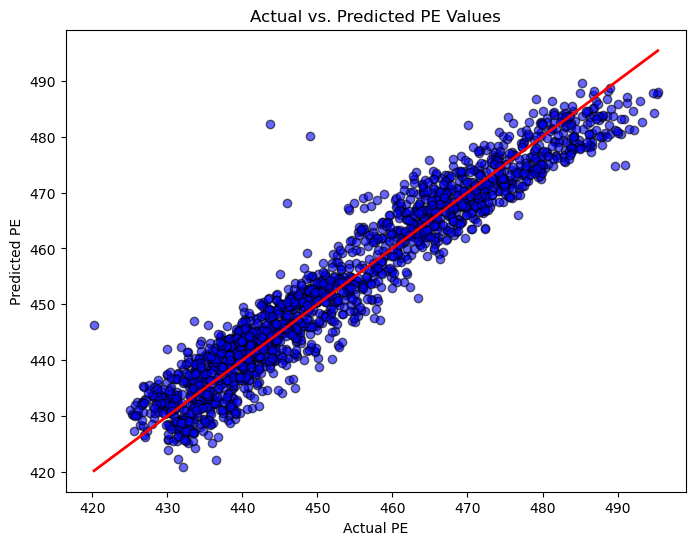

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare data for regression
X = df[['AT', 'V', 'AP', 'RH']]  # Features
y = df['PE']  # Target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Optional: Plot actual vs. predicted values for visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs. Predicted PE Values')
plt.xlabel('Actual PE')
plt.ylabel('Predicted PE')
plt.show()

Random Forest Feature Importances:
  Feature  Importance
0      AT    0.902974
1       V    0.061579
2      AP    0.018436
3      RH    0.017012


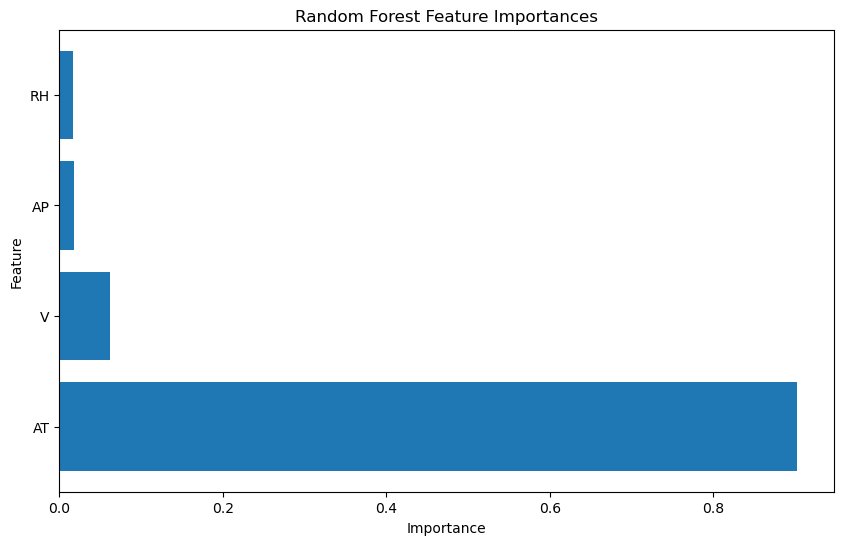

Linear Regression Coefficients:
  Feature  Coefficient
0      AT   -14.778219
1       V    -2.978283
3      RH    -2.308643
2      AP     0.310652


In [28]:
from sklearn.ensemble import RandomForestRegressor  # Already used, but for clarity

# Assuming X_train and models are from previous cells
# If not, ensure you have X (features) and the trained models

# Feature Importance from Random Forest
feature_importances = rf_model.feature_importances_
features = X.columns  # Get the column names
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importances:")
print(importance_df)

# Plot Feature Importances
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Coefficients from Linear Regression
# Get coefficients and sort by absolute value for influence
coef = lr_model.coef_
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coef})
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print("Linear Regression Coefficients:")
print(coef_df[['Feature', 'Coefficient']])

      Actual  Linear_Regression_Predictions  Random_Forest_Predictions
4896  455.63                     459.523213                   456.3322
2293  433.01                     428.501661                   431.8779
4584  457.98                     459.224135                   458.3477
5055  428.60                     434.839955                   429.5914
6326  456.30                     449.788531                   450.6246
7788  486.84                     482.759119                   487.3941
2170  486.19                     477.156784                   476.4761
6902  457.46                     455.264121                   456.3784
3081  473.34                     476.386140                   480.3473
4281  438.65                     439.324241                   438.9903
Linear Regression: MSE: 19.85, R2: 0.9309, MAE: 3.55
Random Forest: MSE: 12.36, R2: 0.9570, MAE: 2.52


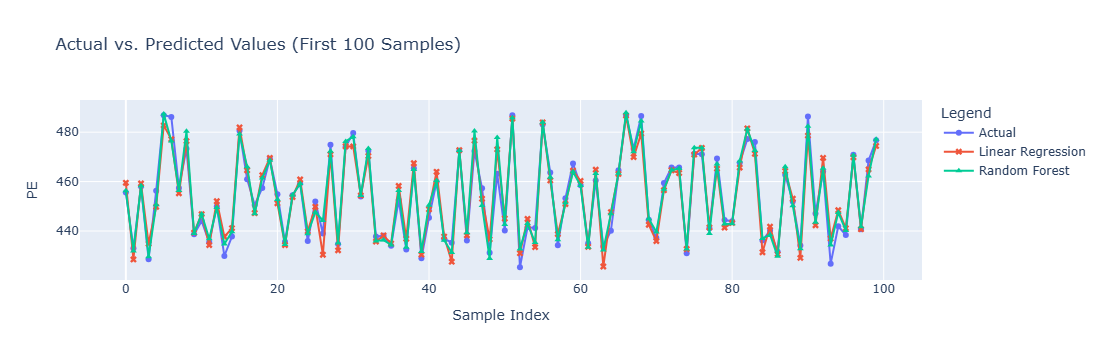

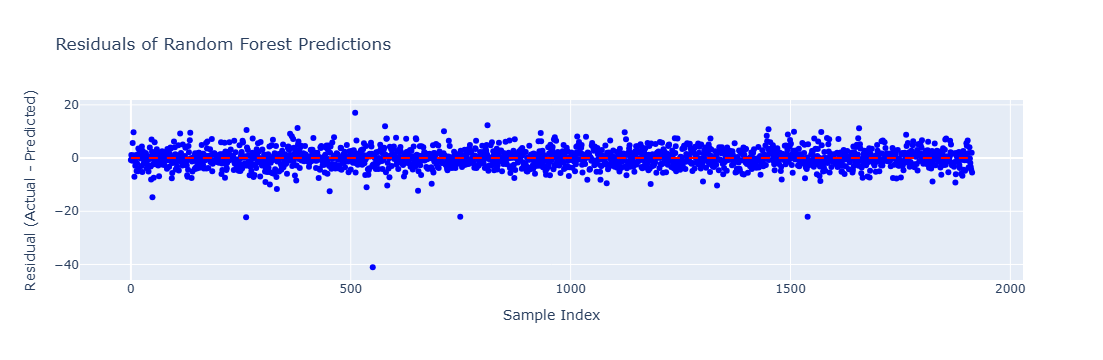

In [26]:
import plotly.graph_objects as go  # For interactive plots
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming y_test, y_pred_lr, and y_pred_rf are available
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Linear_Regression_Predictions': y_pred_lr,
    'Random_Forest_Predictions': y_pred_rf
})

# Print a summary (e.g., first 10 rows)
print(predictions_df.head(10))

# Evaluate metrics (for reference, if not already done)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f'Linear Regression: MSE: {mse_lr:.2f}, R2: {r2_lr:.4f}, MAE: {mae_lr:.2f}')

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f'Random Forest: MSE: {mse_rf:.2f}, R2: {r2_rf:.4f}, MAE: {mae_rf:.2f}')

# Plot actual vs. predicted using Plotly (first 100 for clarity)
n_plot = 100
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=list(range(n_plot)), y=predictions_df['Actual'].iloc[:n_plot], mode='lines+markers', name='Actual', marker=dict(symbol='circle')))
fig1.add_trace(go.Scatter(x=list(range(n_plot)), y=predictions_df['Linear_Regression_Predictions'].iloc[:n_plot], mode='lines+markers', name='Linear Regression', marker=dict(symbol='x')))
fig1.add_trace(go.Scatter(x=list(range(n_plot)), y=predictions_df['Random_Forest_Predictions'].iloc[:n_plot], mode='lines+markers', name='Random Forest', marker=dict(symbol='triangle-up')))
fig1.update_layout(title='Actual vs. Predicted Values (First 100 Samples)',
                   xaxis_title='Sample Index',
                   yaxis_title='PE',
                   legend_title='Legend',
                   hovermode='closest')
fig1.show()  # This will open an interactive plot

# Residual plot for Random Forest using Plotly
residuals_rf = y_test - y_pred_rf
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=list(range(len(residuals_rf))), y=residuals_rf, mode='markers', name='Residuals', marker=dict(color='blue')))
fig2.add_shape(type='line', x0=0, y0=0, x1=len(residuals_rf), y1=0, line=dict(color='red', dash='dash'))
fig2.update_layout(title='Residuals of Random Forest Predictions',
                   xaxis_title='Sample Index',
                   yaxis_title='Residual (Actual - Predicted)',
                   legend_title='Legend',
                   hovermode='closest')
fig2.show()  # This will open an interactive plot

Forecasted PE values: [88.1636382  68.40914563 48.65465306]
Potential cost savings per period (EUR): [14032.6362812  14921.58844672 15810.54061223]
Potential CO2 emissions reduction per period (tons): [124.73454472 132.63634175 140.53813878]


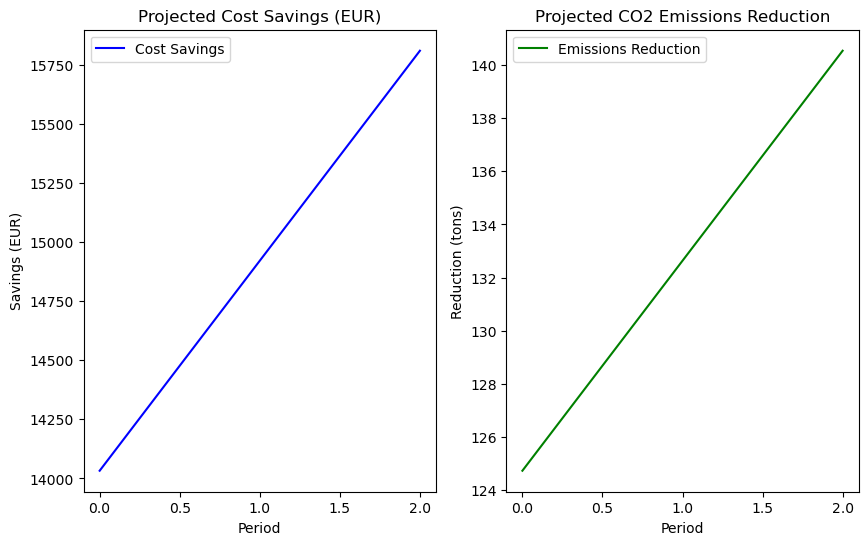

In [25]:
# Use the trained model to predict on new (hypothetical) data
# For example, create a DataFrame with future hypothetical feature values
future_data = np.array([[25, 50, 1010, 70],  # Example: AT=25, V=50, AP=1010, RH=70
                        [26, 51, 1011, 71],
                        [27, 52, 1012, 72]])  # You can expand this for more data points
future_df = pd.DataFrame(future_data, columns=['AT', 'V', 'AP', 'RH'])

# Predict PE for these future values
forecasted_PE = model.predict(future_df)

print("Forecasted PE values:", forecasted_PE)

# Simulate cost projections (e.g., assuming 45 EUR per MW as fuel cost)
fuel_cost_per_MW = 45  # Hypothetical EUR per MW
current_cost_baseline = fuel_cost_per_MW * 400  # Assuming 400 MW as baseline
forecasted_cost = fuel_cost_per_MW * forecasted_PE
cost_savings = current_cost_baseline - forecasted_cost  # Per period savings
print("Potential cost savings per period (EUR):", cost_savings)

# Simulate environmental impact (e.g., CO2 emissions, assuming 0.4 tons CO2 per MW for CCPP)
co2_per_MW = 0.4  # Hypothetical tons of CO2 per MW
current_emissions_baseline = co2_per_MW * 400  # Baseline for 400 MW
forecasted_emissions = co2_per_MW * forecasted_PE
emissions_reduction = current_emissions_baseline - forecasted_emissions
print("Potential CO2 emissions reduction per period (tons):", emissions_reduction)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(cost_savings, label='Cost Savings', color='blue')
plt.title('Projected Cost Savings (EUR)')
plt.xlabel('Period')
plt.ylabel('Savings (EUR)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(emissions_reduction, label='Emissions Reduction', color='green')
plt.title('Projected CO2 Emissions Reduction')
plt.xlabel('Period')
plt.ylabel('Reduction (tons)')
plt.legend()
plt.show()

Cross-Validation R-squared scores: [0.93053597 0.92681472 0.93389127 0.92680208 0.92464499]
Average R-squared: 0.9285378066739307
Mean Squared Error: 21.36229215214084
Summary of Results:
                                Metric         Value
0                  Mean Squared Error     21.362292
1                           R-squared      0.928538
2          Average Cost Savings (EUR)  14921.588447
3  Average Emissions Reduction (tons)    132.636342


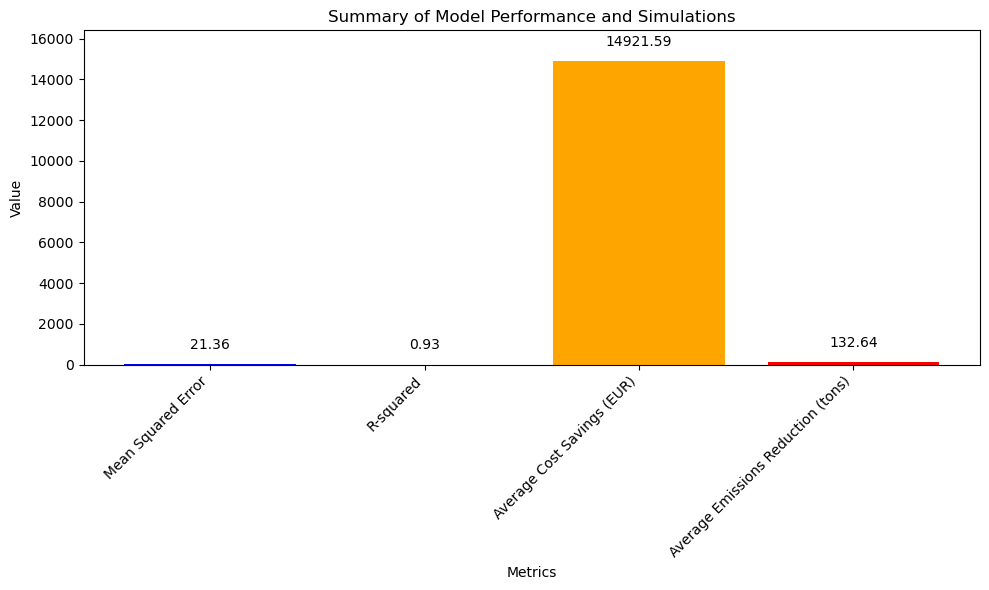

In [46]:
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error  # Ensure this is imported if not already

# Evaluate the model with cross-validation for better reliability
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # 5-fold cross-validation using R-squared
print(f'Cross-Validation R-squared scores: {cv_scores}')
print(f'Average R-squared: {cv_scores.mean()}')

# Calculate MSE explicitly for clarity
mse_value = mean_squared_error(y_test, y_pred)  # Assuming y_test and y_pred are available
print(f'Mean Squared Error: {mse_value}')

# Summarize key results with improved clarity
summary = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'R-squared', 'Average Cost Savings (EUR)', 'Average Emissions Reduction (tons)'],
    'Value': [mse_value, cv_scores.mean(), cost_savings.mean(), emissions_reduction.mean()]  # Using explicit values
})

print("Summary of Results:\n", summary)

# Visualize key outcomes with improved plot for better readability
plt.figure(figsize=(10, 6))  # Increased size for clarity
plt.bar(summary['Metric'], summary['Value'], color=['blue', 'green', 'orange', 'red'])
plt.title('Summary of Model Performance and Simulations')
plt.xlabel('Metrics')  # Added for context
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')  # Improved rotation and alignment
plt.ylim(0, max(summary['Value']) * 1.1)  # Set dynamic y-limit to avoid cutoff
for i, value in enumerate(summary['Value']):
    plt.text(i, value + 0.05 * max(summary['Value']), f'{value:.2f}', ha='center')  # Add value labels on bars
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()